A team of plantation planners are concerned about the yield of oil palm trees, which seems to 
fluctuate. They have collected a set of data and needed help in analysing on how external 
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of 
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the 
analysis, which requires some study on the background of oil palm tree physiology.

In [125]:
import pandas as pd
import numpy as np

In [126]:
data=pd.read_csv('/content/palm_ffb.csv')
data

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [4]:
data.dropna()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44
...,...,...,...,...,...,...,...,...,...
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91


In [6]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [7]:
corData=data.corr().round(3)
corData

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000,-0.650,0.016,-0.500,0.552,-0.057,-0.327,-0.003
Average_Temp,-0.650,1.000,0.180,0.761,-0.369,0.076,0.447,-0.005
Min_Temp,0.016,0.180,1.000,-0.125,0.346,0.068,0.024,0.104
Max_Temp,-0.500,0.761,-0.125,1.000,-0.461,-0.039,0.315,-0.071
Precipitation,0.552,-0.369,0.346,-0.461,1.000,0.128,-0.266,0.290
Working_days,-0.057,0.076,0.068,-0.039,0.128,1.000,0.049,0.116
HA_Harvested,-0.327,0.447,0.024,0.315,-0.266,0.049,1.000,-0.350
FFB_Yield,-0.003,-0.005,0.104,-0.071,0.290,0.116,-0.350,1.000


In [8]:
import seaborn as sn
import matplotlib.pyplot as plt

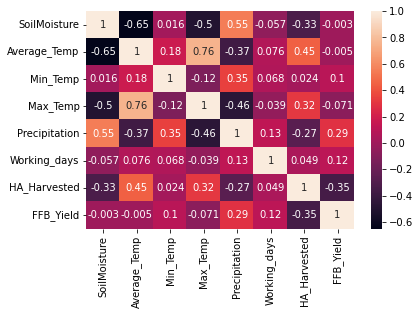

In [9]:
sn.heatmap(corData, annot=True)
plt.show()

From the heatmap we can see that SoilMoisture , Average_Temp and Max_Temp are correlated\

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [124]:
X=np.array(data[['SoilMoisture','Average_Temp','Min_Temp','Max_Temp','Precipitation','Working_days','HA_Harvested']])
Y=np.array(data[['FFB_Yield']])

Feature: 0, Score: -0.00111
Feature: 1, Score: 0.09133
Feature: 2, Score: -0.02489
Feature: 3, Score: -0.01294
Feature: 4, Score: 0.00132
Feature: 5, Score: 0.01398
Feature: 6, Score: -0.00000


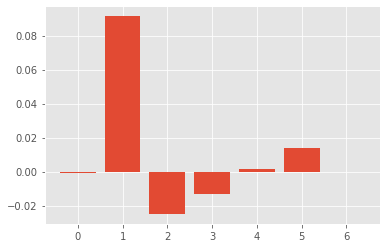

In [121]:
LR_Model=LinearRegression()
LR_Model.fit(X,Y)
importance=LR_Model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can see from the linear regression coefficient that average_temp , Min_Temp, and Working days affect the FFB_Yield in regression model

Feature: 0, Score: 0.07929
Feature: 1, Score: 0.17231
Feature: 2, Score: 0.11487
Feature: 3, Score: 0.02827
Feature: 4, Score: 0.24638
Feature: 5, Score: 0.00344
Feature: 6, Score: 0.35544


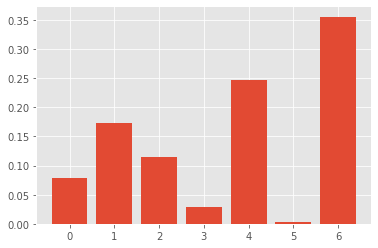

In [112]:
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can see from the Decision Tree regressor importance feature that the highest importance attribute/ feature is HA_Harvested followed By , Precipitation and Average_Temp. It means they are affeting teh FFB_Yield

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature: 0, Score: 0.10599
Feature: 1, Score: 0.14914
Feature: 2, Score: 0.06853
Feature: 3, Score: 0.07698
Feature: 4, Score: 0.24713
Feature: 5, Score: 0.03701
Feature: 6, Score: 0.31523


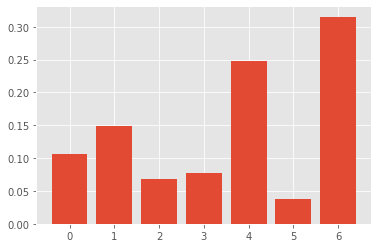

In [110]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can see from the Random Forest Regressor importance feature that the highest importance attribute/ feature is HA_Harvested followed By , Precipitation and Average_Temp. It means they are affeting teh FFB_Yield

So, we can conclude that HA_Harverst, Precipitation, Average_Temp are very influence fresh fruit bunch (FFB) yield. Beside the feature / attribute that affect the FFB_Yield directly, we can see in heatmap above that Average_Temp has a correlation with SoilMoisture and Max_Temp. so we can say SoilMoisture and Max_Temp indirectly influence FFB_Yield